<a href="https://colab.research.google.com/github/ameyadalvi84/CIFAR10/blob/master/CIFAR10_Dataset_using_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR10 data set in Keras

In [2]:
import keras as K
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
print("Shape of train_images : ", train_images.shape)
print("Max value in train_images : ", train_images.max())
print("Min value in train_images : ", train_images.min())

170500096/170498071 [==============================] - 6s 0us/step
Shape of train_images :  (50000, 32, 32, 3)
Max value in train_images :  255
Min value in train_images :  0


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


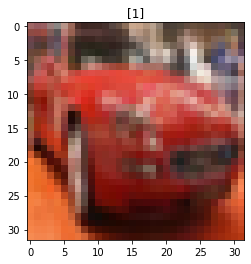

In [4]:
import random

random.seed(123456)
indx = random.randint(1,10)
plt.imshow(train_images[indx],cmap=plt.cm.brg)
plt.title(train_labels[indx])
plt.show()

In [0]:
train_images = train_images.astype('float32') / train_images.max()
train_labels_cat = to_categorical(train_labels)
test_images = test_images.astype('float32') / train_images.max()
test_labels_cat = to_categorical(test_labels)

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(layers.MaxPool2D())
  #model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
num_val_records = 5000
epoch = 30
val_images = train_images[:num_val_records]
val_labels = train_labels_cat[:num_val_records]
partial_train_images = train_images[num_val_records:]
partial_train_labels = train_labels_cat[num_val_records:]
model1 = build_model()
history = model1.fit(partial_train_images,
                     partial_train_labels,
                     batch_size=128,
                     epochs=epoch,
                     validation_data=(val_images,val_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 13s 283us/step - loss: 1.7357 - accuracy: 0.3535 - val_loss: 1.4242 - val_accuracy: 0.4788
Epoch 2/30
45000/45000 [==============================] - 5s 117us/step - loss: 1.2991 - accuracy: 0.5283 - val_loss: 1.1365 - val_accuracy: 0.5954
Epoch 3/30
45000/45000 [==============================] - 5s 116us/step - loss: 1.1084 - accuracy: 0.6034 - val_loss: 1.0848 - val_accuracy: 0.6156
Epoch 4/30
45000/45000 [==============================] - 5s 116us/step - loss: 0.9854 - accuracy: 0.6506 - val_loss: 0.9545 - val_accuracy: 0.6654
Epoch 5/30
45000/45000 [==============================] - 5s 117us/step - loss: 0.8863 - accuracy: 0.6858 - val_loss: 0.9617 - val_accuracy: 0.6566
Epoch 6/30
45000/45000 [==============================] - 5s 117us/step - loss: 0.8133 - accuracy: 0.7136 - val_loss: 0.9097 - val_accuracy: 0.6826
Epoch 7/30
45000/45000 [==============================] - 5s 1

In [8]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 64)         

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

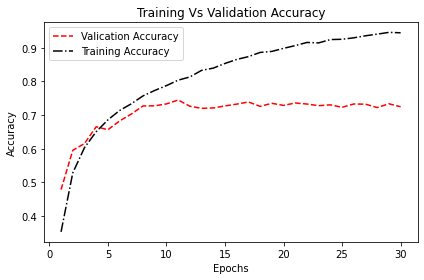

In [10]:
val_acc = history_dict['val_accuracy']
train_acc = history_dict['accuracy']
epoch_num = range(1,len(train_acc)+1)

plt.plot(epoch_num,val_acc,'r--', label="Valication Accuracy")
plt.plot(epoch_num,train_acc,'k-.',label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title("Training Vs Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
result = model1.evaluate(test_images,test_labels_cat)
result

10000/10000 [==============================] - 1s 125us/step


[568.4104721191406, 0.5228999853134155]

Thoughts.


> Need to try some regularization techniques


> Try Drop outs


> Try augmentation


> Try some different architecture like Resnet






